In [1]:
'''Test created models here'''
#from cuda import set_cuda
#import mlogger
import sys
sys.path.append("..")
sys.path.append("../data")
sys.path.append("../models")


from data import get_dataset, clusters, half_doughnuts
from models_utils import *
import models
import torch.nn as nn

from learn import *

from matplotlib import pyplot as plt
%matplotlib inline

'''
from cli import parse_command
from losses import get_loss
from utils import setup_xp, set_seed
from data import get_data_loaders
from models import get_model, load_best_model
from optim import get_optimizer, decay_optimizer
from epoch import train, test
'''

'\nfrom cli import parse_command\nfrom losses import get_loss\nfrom utils import setup_xp, set_seed\nfrom data import get_data_loaders\nfrom models import get_model, load_best_model\nfrom optim import get_optimizer, decay_optimizer\nfrom epoch import train, test\n'

In [2]:
from learn_utils import *
log = Logger()
log.load('MLP_training')
print(log.logs)
log.get('training')

[]


[]

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
dnn = {"input_size": 1024, "hidden_size":16, "num_classes":10,"num_layer": 2, "activation": nn.ReLU()}
model = get_model("mlp", **dnn)
print(model.__class__.__name__)

MLP


Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 2.090360641479492, "error": 0.75}
[0] test metrics:{"loss": 1.9210023880004883, "error": 0.625}
Epoch number: 0 
Epoch Time: 1.87 sec
[1] train metrics:{"loss": 1.8633012771606445, "error": 0.5}
[1] test metrics:{"loss": 1.60455322265625, "error": 0.375}
Epoch number: 1 
Epoch Time: 1.89 sec
[2] train metrics:{"loss": 1.442671537399292, "error": 0.625}
[2] test metrics:{"loss": 1.4748129844665527, "error": 0.375}
Epoch number: 2 
Epoch Time: 1.94 sec
[3] train metrics:{"loss": 1.3228139877319336, "error": 0.5}
[3] test metrics:{"loss": 1.42353355884552, "error": 0.5}
Epoch number: 3 
Epoch Time: 2.3 sec
[4] train metrics:{"loss": 1.2465169429779053, "error": 0.375}
[4] test metrics:{"loss": 1.3663402795791626, "error": 0.375}
Epoch number: 4 
Epoch Time: 1.95 sec
FINISHED TRAINING


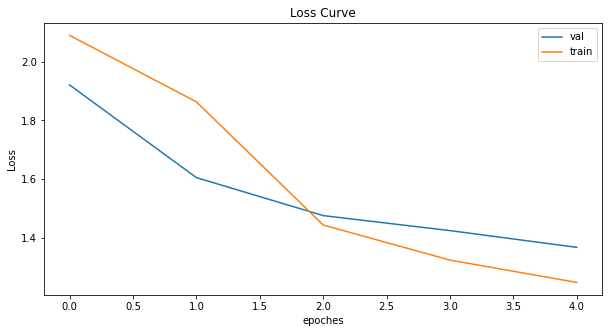

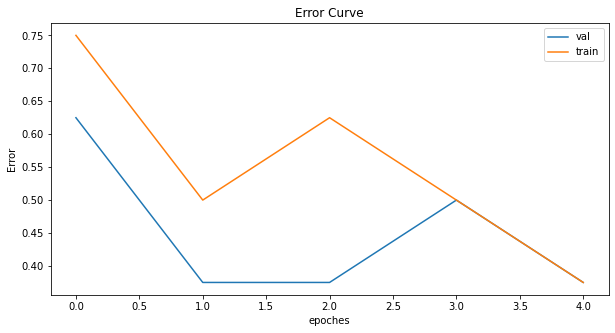

In [6]:
train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=5, device=device, dataset='mnist', lossfn=None,
  train_loader=mnist_train, val_loader=mnist_val, weight_decay=0.0, lr=0.001, momentum=0.9)

In [3]:
cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 50, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)

CNN


In [4]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Files already downloaded and verified
Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 32


In [6]:
train(model=cnn_model, loss='ce', optimizer='sgd', scheduler=None, epochs=6, device=device, dataset='cifar10', lossfn=None,
 disable_bn=False, train_loader=cifar10_train, val_loader=cifar10_val, weight_decay=0.0, lr=0.001, momentum=0.9)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 2.0356791019439697, "error": 0.75}
[0] test metrics:{"loss": 2.1037986278533936, "error": 0.75}
Epoch number: 0 :
 Epoch Time: 154.84 sec
[1] train metrics:{"loss": 1.8381295204162598, "error": 0.625}
Epoch number: 1 :
 Epoch Time: 146.59 sec
[2] train metrics:{"loss": 1.835350513458252, "error": 0.8125}
Epoch number: 2 :
 Epoch Time: 140.64 sec
[3] train metrics:{"loss": 1.7502562999725342, "error": 0.6875}
Epoch number: 3 :
 Epoch Time: 138.37 sec
[4] train metrics:{"loss": 1.598954439163208, "error": 0.5625}
Epoch number: 4 :
 Epoch Time: 143.85 sec
[5] train metrics:{"loss": 1.5450400114059448, "error": 0.8125}
[5] test metrics:{"loss": 1.4523138999938965, "error": 0.625}
Epoch number: 5 :
 Epoch Time: 143.98 sec
FINISHED TRAINING


In [5]:
test(model=cnn_model, loss='ce', optimizer='sgd', device=device, dataset='cifar10', lossfn=None, disable_bn=False, test_loader=cifar10_test, at_epoch=5)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
[0] test metrics:{"loss": 1.297176718711853, "error": 0.5}
FINISHED TESTING


In [26]:
#train, val, test = get_dataset("csv", path='../data/csv_datasets/winequality-red.csv')
#train(model=model, loss='ce', optimizer='sgd', scheduler=None, epochs=30, device=device, dataset='non', lossfn=None,
# disable_bn=False, train_loader=train, val_loader=test, weight_decay=0.0, lr=0.001, momentum=0.9)

TypeError: 'DataLoader' object is not callable